# Assignment 4 - Unsupervised Learning and More Supervised Learning

## *Joseph Littell*
Netid:  *JPL51*

## 1

### [35 points] Clustering

Clustering can be used to determine structure, assign group membership, and representing data through compression. Here you'll dive deeply into clustering exploring the impact of a number of classifiers on 

**(a)** Implement your own k-means algorithm. Demonstrate the efficacy of your algorithm on the `blobs` dataset from `scikit-learn` with 2 and 5 cluster centers. For each implementation rerun the k-means algorithm for values of k from 1 to 10 and for each plot the "elbow curve" where you plot the sum of square error. For each case, where is the elbow in the curve? Explain why.

**(b)** Briefly explain in 1-2 sentences each (and at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering

**(c)** For each of the clustering algorithms in (b) run each of them on the five datasets below. Tune the parameters in each model to achieve better performance. Plot the final result as a 4-by-5 subplot showing the performance of each method on each dataset. Which methods work best/worst on each dataset and why?
- Aggregation.txt
- Compound.txt
- D31.txt
- jain.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

**ANSWER**



Part A:



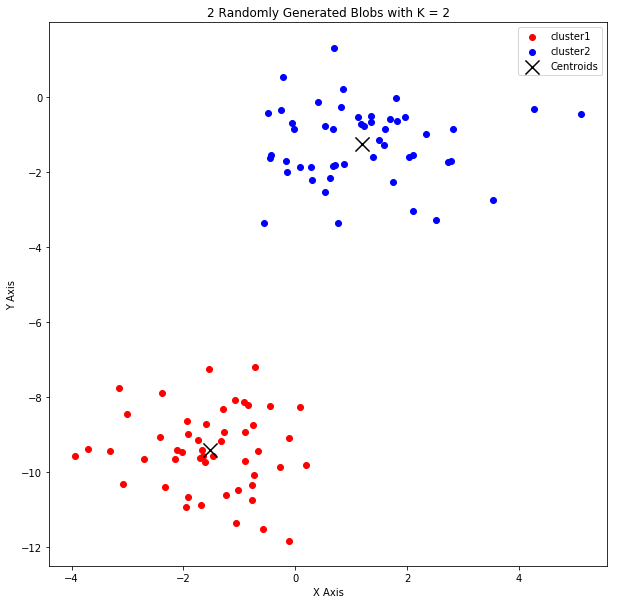

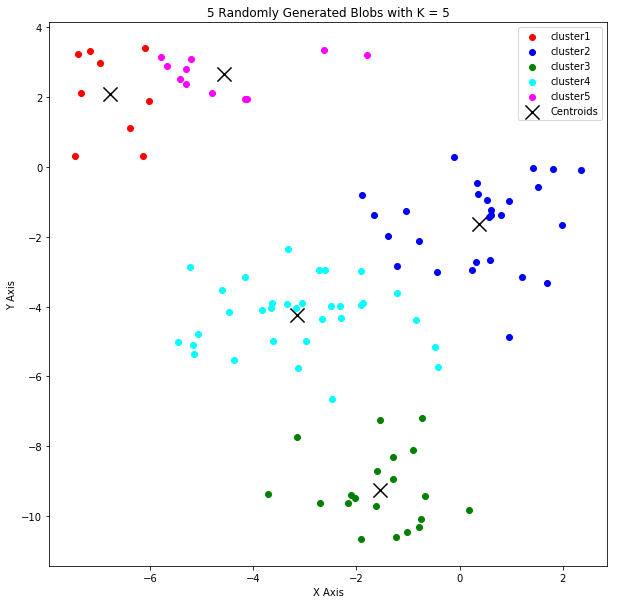

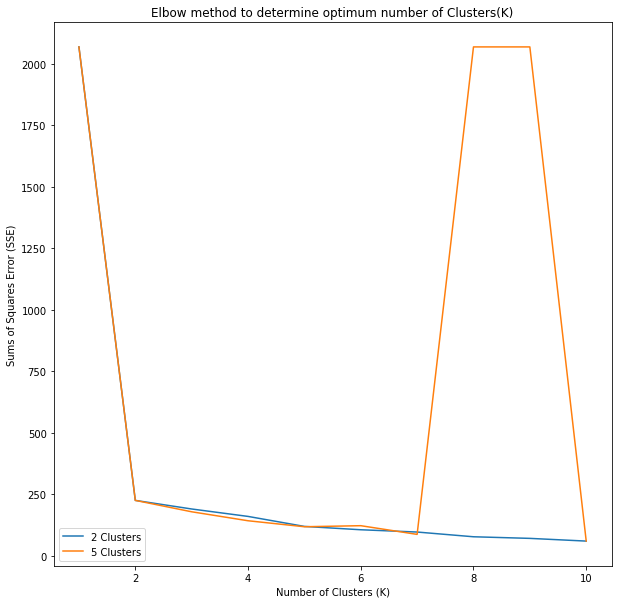

In [282]:
##########
# Part A #
##########

'''
(a) Implement your own k-means algorithm. Demonstrate the efficacy of your algorithm on the blobs dataset 
from scikit-learn with 2 and 5 cluster centers. For each implementation rerun the k-means algorithm for 
values of k from 1 to 10 and for each plot the "elbow curve" where you plot the sum of square error. 
For each case, where is the elbow in the curve? Explain why.
'''

#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd

class Kmeans:
    # initiate the Class
    def __init__(self, X, K):
        self.X = X
        self.Output = {}
        self.Centroids = np.array([]).reshape(self.X.shape[1], 0)
        self.K = K
        self.m = self.X.shape[0]
    
    
    def kmeanspp(self, X, K):
        i = rd.randint(0, X.shape[0])
        Centroid_temp = np.array([X[i]])
        for k in range(1, K):
            D = np.array([]) 
            for x in X:
                D = np.append(D, np.min(np.sum((x - Centroid_temp)**2)))
            prob = D / np.sum(D)
            cummulative_prob = np.cumsum(prob)
            r = rd.random()
            i = 0
            for j,p in enumerate(cummulative_prob):
                if r < p:
                    i = j
                    break
            Centroid_temp = np.append(Centroid_temp,[X[i]],axis = 0)
        return Centroid_temp.T
    
    def fit(self,n_iter):
        #randomly Initialize the centroids
        self.Centroids = self.kmeanspp(self.X,self.K)
        
        #compute euclidian distances and assign clusters
        for n in range(n_iter):
            EuclidianDistance = np.array([]).reshape(self.m,0)
            for k in range(self.K):
                tempDist = np.sum((self.X-self.Centroids[:,k])**2,axis = 1)
                EuclidianDistance = np.c_[EuclidianDistance, tempDist]
            C = np.argmin(EuclidianDistance,axis = 1) + 1
            
            #adjust the centroids
            Y = {}
            for k in range(self.K):
                Y[k+1] = np.array([]).reshape(2,0)
            for i in range(self.m):
                Y[C[i]] = np.c_[Y[C[i]], self.X[i]]
        
            for k in range(self.K):
                Y[k+1] = Y[k+1].T
            for k in range(self.K):
                self.Centroids[:,k] = np.mean(Y[k+1],axis=0)
                
            self.Output = Y
            
    # after fitting the data, output the Centroid and prediction
    def predict(self):
        return self.Output, self.Centroids.T
    
    # Calculate the Sum of Squares Error of the clusters
    def SSE(self):
        SSE = 0
        for k in range(self.K):
            wcss += np.sum((self.Output[k+1] - self.Centroids[:,k])**2)
        return SSE
    
# Create the Data    
# Make 2 blobs
X2, y2 = make_blobs(n_samples = 100, centers = 2, n_features = 2, random_state = 2)
# Make 5 blobs
X5, y5 = make_blobs(n_samples = 100, centers = 5, n_features = 2, random_state = 2)

# set the classifier when K = 2
clf2 = Kmeans(X2, 2)
clf2.fit(100)
Output2, Centroids2 = clf2.predict()

# set the classifier when K = 5
clf5 = Kmeans(X5, 5)
clf5.fit(100)
Output5, Centroids5 = clf5.predict()

print("\n\nPart A:\n")

# Plot the results of Kmeans on two blobs with K = 2
color = ['red', 'blue']
labels = ['cluster1', 'cluster2']

# set K to 2
K = 2

# set figure size
plt.figure(figsize = (10, 10))
for k in range(K):
    plt.scatter(Output2[k+1][:,0], Output2[k+1][:,1],c = color[k], label = labels[k])
plt.scatter(Centroids2[:,0], Centroids2[:,1], s = 200, c = 'black', marker='x', label = 'Centroids')
plt.title('2 Randomly Generated Blobs with K = 2')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.show()

# Plot the results of Kmeans on 5 blobs with K = 5
color = ['red','blue','green','cyan','magenta']
labels = ['cluster1','cluster2','cluster3','cluster4','cluster5']

# set K to 5
K = 5

# set figure size
plt.figure(figsize = (10, 10))
for k in range(K):
    plt.scatter(Output5[k+1][:,0], Output5[k+1][:,1], c = color[k], label = labels[k])
plt.scatter(Centroids5[:,0], Centroids5[:,1], s = 200, c = 'black', marker='x', label = 'Centroids')
plt.title('5 Randomly Generated Blobs with K = 5')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.show()

# Calculate the SSE for 2 blobs
SSE_array2 = np.array([])
for K in range(1,11):
    blob2 = Kmeans(X2,K)
    blob2.fit(50)
    Output2, Centroids2 = blob2.predict()
    sse2 = 0
    for k in range(K):
        sse2 += np.sum((Output2[k+1] - Centroids2[k,:])**2)
    SSE_array2 = np.append(SSE_array2, sse2)

# Calculate SSE for 5 blobs
SSE_array5 = np.array([])
for K in range(1,11):
    blob5 = Kmeans(X2,K)
    blob5.fit(50)
    Output5, Centroids5 = blob5.predict()
    sse5 = 0
    for k in range(K):
        sse5 += np.sum((Output5[k+1] - Centroids5[k,:])**2)
    SSE_array5 = np.append(SSE_array5, sse5)    

# Plot the Sum of Squares Error for K = 1 through 10
k_array = np.arange(1,11,1)
plt.figure(figsize = (10, 10))
plt.plot(k_array, SSE_array2, label = "2 Clusters")
plt.plot(k_array, SSE_array5, label = "5 Clusters")
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sums of Squares Error (SSE)')
plt.title('Elbow method to determine optimum number of Clusters(K)')
plt.legend()
plt.show()

In [228]:
##########
# Part B #
##########

'''
(b) Briefly explain in 1-2 sentences each (and at a very high level) 
how the following clustering techniques work and what distinguishes them from other clustering methods: 

(1) k-means, 
(2) agglomerative clustering, 
(3) Gaussian mixture models, 
(4) DBSCAN, and 
(5) spectral clustering
'''

print("\n\nPart B:\n")
print("K means works by identifying a centroid or center of a cluster by determining the distance, euclidian or otherwise,")
print("between the points. This allows the centroid to shift after its initial random selection to determine the most accurate")
print("clustering.")
print("")
print("Agglomerative works by building a bottom up hierchary where every point starts off as its own individual cluster and")
print("grouping those clusters based on distance through the use of a dendrogram. The specific level of clustering is chosen")
print("by the user.")
print("")
print("Gaussian mixture models work by utilizing the distribution of variance between the points assuming that the clusters")
print("themselves are a gaussian distribution. As such with similar variance are grouped together to form each cluster")
print("")
print("DBScan works by classifying each point as a core point, border point, or outlier point based on the number of nearby points.")
print("It then groups neighboring core and border points to form the clusters. This allows it to find arbitrarily shaped clusters,")
print(" and makes it robust to outliers. However it cannot handle significant variation in cluster density. ")
print("")
print("Spectural works by utlizing an affinity matrix for correctness as opposed to compactness/speed. As such it utilizes the")
print("affinity matrix to separate priniciply compotents before using a simpler clustering method (DB or KMeans) to seperate")
print("at the lower dimension")



Part B:

K means works by identifying a centroid or center of a cluster by determining the distance, euclidian or otherwise,
between the points. This allows the centroid to shift after its initial random selection to determine the most accurate
clustering.

Agglomerative works by building a bottom up hierchary where every point starts off as its own individual cluster and
grouping those clusters based on distance through the use of a dendrogram. The specific level of clustering is chosen
by the user.

Gaussian mixture models work by utilizing the distribution of variance between the points assuming that the clusters
themselves are a gaussian distribution. As such with similar variance are grouped together to form each cluster

DBScan works by classifying each point as a core point, border point, or outlier point based on the number of nearby points.
It then groups neighboring core and border points to form the clusters. This allows it to find arbitrarily shaped clusters,
 and makes i



Part C:



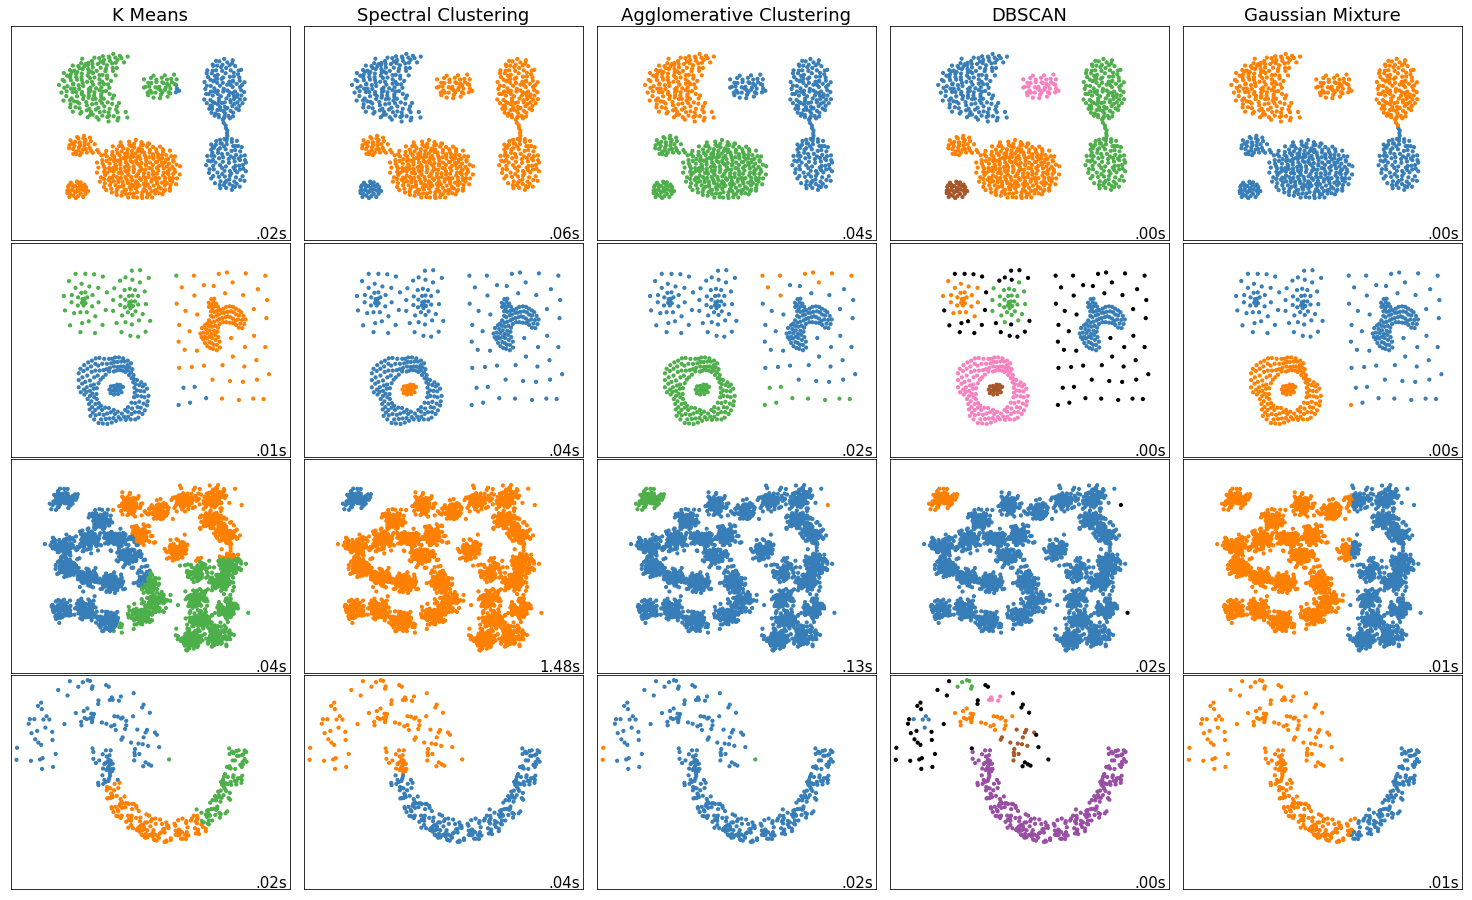

On the Aggregation dataset, Spectral and DBSCAN performed the best due to the fact that they are not generally affected
by the shape of the clusters. As such, K Means, Agglomerative and GMM perfomed the worst. That being said, at low/small K
these models didn't have as noticable issue, only when trying to isolate each 

On the Comound datastet, the results are similar to the aggreation dataset due to the non uniformity of the shapes. However,
DBSCAN was the only method able to identify the upper left two clusters. The caveat to this is DBSCAN also had a number
outliers as the clusters 'flaired' from the center

On the D31 dataset, K Means, Spectral and GMM did the best due to the uniformity of the shape and size of the clusters.
Agglomerative and DBSCAN has particular issue with it due to the proximity of the clusters to each other.

Finally, on the Jain dataset, only Spectral performed well, with DBScan having some issues due to the difference in density
between the two half circles. 

In [352]:
##########
# Part C #
##########

'''
(c) For each of the clustering algorithms in (b) run each of them on the five datasets below. 
Tune the parameters in each model to achieve better performance. 
Plot the final result as a 4-by-5 subplot showing the performance of each method on each dataset. 
Which methods work best/worst on each dataset and why?

Aggregation.txt
Compound.txt
D31.txt
jain.txt

Each file has three columns: the first two are  x1  and  x2 , 
then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). 
'''
import warnings
warnings.filterwarnings('ignore')
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

# Import the datasets that are given

aggregation = pd.read_table("./data/Aggregation.txt",delim_whitespace=True, names=["x1", "x2", "y"])
compound = pd.read_table("./data/Compound.txt",delim_whitespace=True, names=["x1", "x2", "y"])
d31 = pd.read_table("./data/D31.txt",delim_whitespace=True, names=["x1", "x2", "y"])
jain = pd.read_table("./data/jain.txt",delim_whitespace=True, names=["x1", "x2", "y"])

np.random.seed(0)

X_aggregation = np.array(list(zip(aggregation.x1, aggregation.x2))).reshape(len(aggregation.x1), 2)
X_compound = np.array(list(zip(compound.x1, compound.x2))).reshape(len(compound.x1), 2)
X_d31 = np.array(list(zip(d31.x1, d31.x2))).reshape(len(d31.x1), 2)
X_jain = np.array(list(zip(jain.x1, jain.x2))).reshape(len(jain.x1), 2)

# Set up graph parameters
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left = .02, right = .98, bottom = .001, top = .96, wspace = .05, hspace=.01)
plot_num = 1

datasets = [(X_aggregation, {}), (X_compound, {}), (X_d31, {}), (X_jain, {})]

print("\n\nPart C:\n")

# Read through each Dataset
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile = params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(X, n_neighbors = params['n_neighbors'], include_self=False)
    
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # Create cluster objects
    k_Means = cluster.KMeans(3)
    spectral = cluster.SpectralClustering(n_clusters = 2, 
                                          eigen_solver = 'arpack', 
                                          affinity = "nearest_neighbors")
    dbscan = cluster.DBSCAN(eps = .2)
    average_linkage = cluster.AgglomerativeClustering(linkage = "average", 
                                                      affinity = "cityblock", 
                                                      n_clusters = params['n_clusters'], 
                                                      connectivity=connectivity)
    gmm = mixture.GaussianMixture(n_components = 2, covariance_type = 'full')

    clustering_algorithms = (
        ('K Means', k_Means),
        ('Spectral Clustering', spectral),
        ('Agglomerative Clustering', average_linkage),
        ('DBSCAN', dbscan),
        ('Gaussian Mixture', gmm))
    
    for name, algorithm in clustering_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size = 18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform = plt.gca().transAxes, size=15,
                 horizontalalignment = 'right')
        plot_num += 1

plt.show()

print('On the Aggregation dataset, Spectral and DBSCAN performed the best due to the fact that they are not generally affected')
print('by the shape of the clusters. As such, K Means, Agglomerative and GMM perfomed the worst. That being said, at low/small K')
print('these models didn\'t have as noticable issue, only when trying to isolate each ')
print('')
print('On the Comound datastet, the results are similar to the aggreation dataset due to the non uniformity of the shapes. However,')
print('DBSCAN was the only method able to identify the upper left two clusters. The caveat to this is DBSCAN also had a number')
print('outliers as the clusters \'flaired\' from the center')
print('')
print('On the D31 dataset, K Means, Spectral and GMM did the best due to the uniformity of the shape and size of the clusters.')
print('Agglomerative and DBSCAN has particular issue with it due to the proximity of the clusters to each other.')
print('')
print('Finally, on the Jain dataset, only Spectral performed well, with DBScan having some issues due to the difference in density')
print('between the two half circles. None of the other methods worked well.')

## 2

### [25 points] Visualizing and clustering digits with PCA and t-SNE

**(a)** Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the resulting 2-dimensional representation of the data.

**(b)** t-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/). A video introducing this method can be found [here](https://www.youtube.com/watch?v=RJVL80Gg3lA&list=UUtXKDgv1AVoG88PLl8nGXmw) for those who are interested.

*NOTE: An important note on t-SNE is that it is an example of transductive learning. This means that the lower dimensional representation of the data is only applicable to the specific input data - you can't just add a new sample an plot it in the sample 2-dimensional space without entirely rerunning the algorithm and finding a new representation of the data.*

**(c)** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? Given the comparative clustering performance that you observed and the note on t-SNE above, what are the pros and cons of PCA and t-SNE? *Note: You typically will not have labels available.*

**ANSWER**

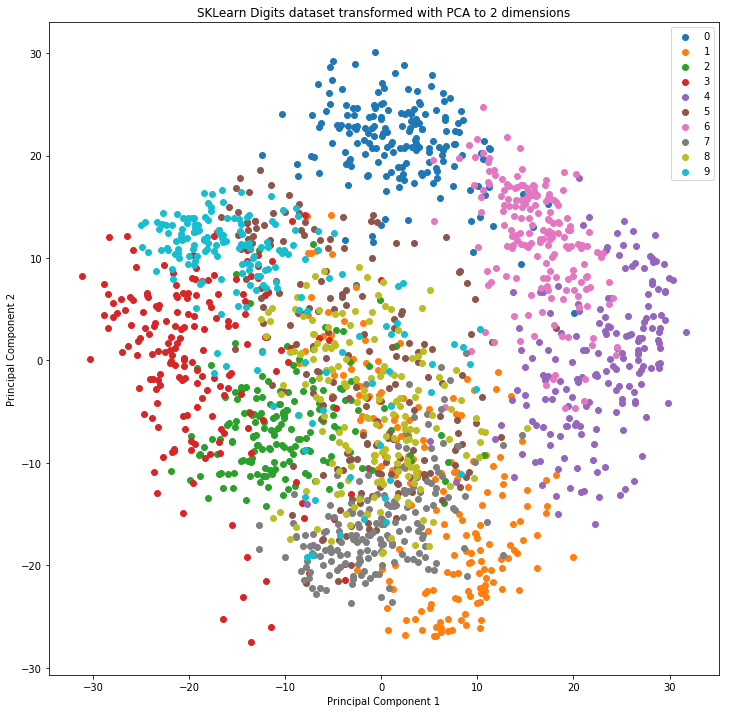

In [145]:
##########
# Part A #
##########

'''(a) Load the scikit-learn digits dataset. 
Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. 
Plot the resulting 2-dimensional representation of the data.
'''

# Load the libraries
import numpy as np
from sklearn import decomposition
from sklearn import datasets
from sklearn.datasets import load_digits

# load the dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

digits = load_digits()

# Conduct PCA
pca = decomposition.PCA(2)                     # initiate PCA utilizing 2 compoents
projected = pca.fit_transform(digits.data)     # conduct PCA on the digits data

# Plot PCA 
plt.figure(figsize = (12,12))                  # set the graph's size

for i in digits.target_names:
    loc = np.where(digits.target == i)                               # Identify each label
    plt.scatter(projected[loc, 0], projected[loc, 1], label = i)     # Plot the data with each label
    
plt.title('SKLearn Digits dataset transformed with PCA to 2 dimensions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc = "upper right")
plt.show()


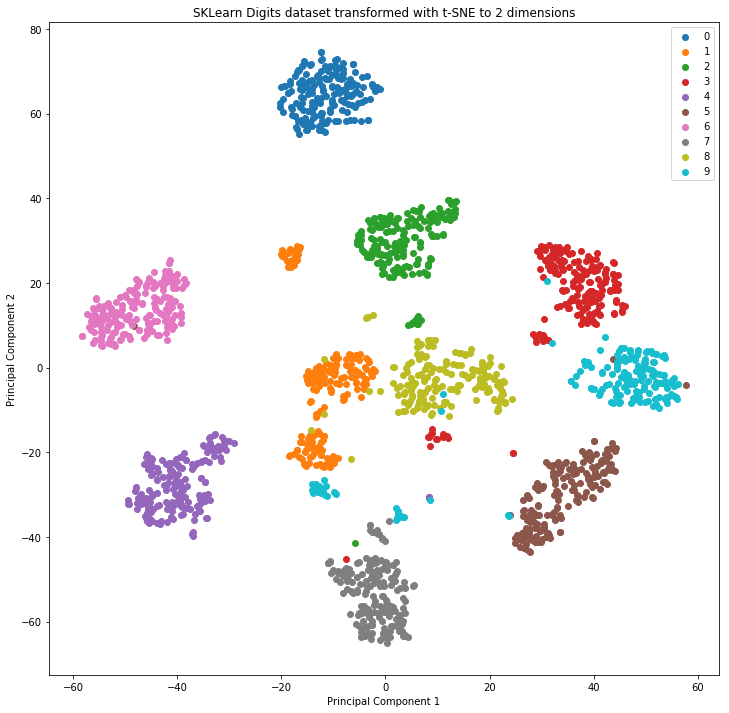

In [90]:
##########
# Part B #
##########

'''
(b) t-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique 
that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces.
Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). 
You may need to adjust the parameters to get acceptable performance. 
You can read more about how to use t-SNE effectively here. 
A video introducing this method can be found here for those who are interested.

NOTE: An important note on t-SNE is that it is an example of transductive learning. 
This means that the lower dimensional representation of the data is only applicable to the specific input data - 
you can't just add a new sample an plot it in the sample 2-dimensional space without entirely rerunning the algorithm
and finding a new representation of the data.
'''

# Load the libraries
from sklearn import manifold

# Conduct t-SNE
tsne = manifold.TSNE(2)                         # initialize TSNE for two components
projected = tsne.fit_transform(digits.data)     # Conduct TSNE 

plt.figure(figsize = (12,12))

# Plot the compressed/transformed data
for i in digits.target_names:
    loc = np.where(digits.target == i)
    plt.scatter(projected[loc, 0], projected[loc, 1], label = i)
    
plt.title('SKLearn Digits dataset transformed with t-SNE to 2 dimensions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc = "upper right")
plt.show()


In [224]:
##########
# Part C #
##########

'''
(c) Compare/contrast the performance of these two techniques. 
Which seemed to cluster the data best and why? 
Given the comparative clustering performance that you observed and the note on t-SNE above, 
what are the pros and cons of PCA and t-SNE? Note: You typically will not have labels available.
'''

print("\n\nPart C:\n")
print("Given the previous two graphs, t-SNE seems to separate the clusters the best so that is is easily observable in")
print("a visual inspection. DCA using coviariance and eigenvectors to separate the data still leaves a large amount of overlap")
print("which leads to less accuracte clustering. With t-SNE allowing for greater seperation between clusters at the cost of speed.")
print("")
print("For Pros and cons, it is a trade off between speed and accuracy for PCA and t-SNE. If the dataset is extremely large,")
print("then t-SNE, despite being more accurate, will have a substantial computational cost.")



Part C:

Given the previous two graphs, t-SNE seems to separate the clusters the best so that is is easily observable in
a visual inspection. DCA using coviariance and eigenvectors to separate the data still leaves a large amount of overlap
which leads to less accuracte clustering. With t-SNE allowing for greater seperation between clusters at the cost of speed.

For Pros and cons, it is a trade off between speed and accuracy for PCA and t-SNE. If the dataset is extremely large,
then t-SNE, despite being more accurate, will have a substantial computational cost.


## 3

### [30 points] PCA for compression

From the digits dataset, extract all the 5's. Your going to create a compressed version of one of an image.

**(a)** Plot a number of examples of the original images.

**(b)** Perform PCA on the data. Create a plot showing the fraction of variance explained as you incorporate from $1$ to $N$ components. 

**(c)** Select an image (from your dataset of 5's) that you will "compress" using PCA. Use the principal components extracted in (b) for data compression: choose the top $k$ principal components and represent the data using a subset of the total principal components. Plot the original image, and compressed versions with different levels of compression (i.e. using different numbers of the top principal components): use $k=1,5,10,25$.

**(d)** How many principal components are required to well-approximate the data in (c)? How much compression is achieved in each case (express compression as the ratio of $k$ to the original dimension of the data $D$, so it ranges from $0$ to $1$). Comment on each case.

**ANSWER**



Part A:



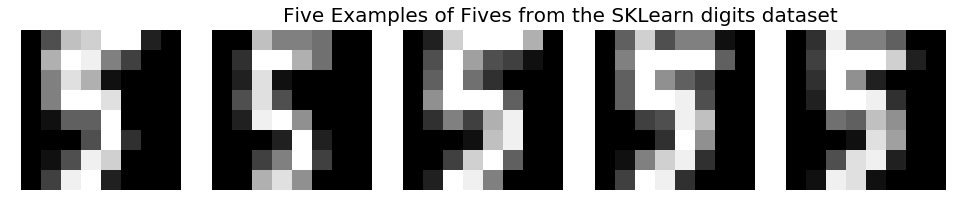

In [4]:
##########
# Part A #
##########

'''
(a) Plot a number of examples of the original images.
'''

# Load the libraries
import numpy as np
from sklearn import datasets
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from pylab import rcParams

# Load the dataset
digits = datasets.load_digits(return_X_y=True)
data = digits[0]
labels = digits[1]

# load the data
digits = load_digits()

# separate fives frome the dataset
onlyFives = []
for i in range(len(labels)):
    if labels[i] == 5:
        onlyFives.append(digits.data[i])
        
# Convert to a NP array
onlyFives = np.array(onlyFives)

print("\n\nPart A:\n")

# Plot the examples in a 1 X 5 subplot
plt.figure(figsize = (20, 3))
plt.suptitle("Five Examples of Fives from the SKLearn digits dataset", fontsize = 20)
for i in range(1,6):
    plt.subplot(1,6,i)
    plt.axis("off")
    plt.imshow(onlyFives[i].reshape(8,8), cmap = 'gray')
plt.show()



Part B:



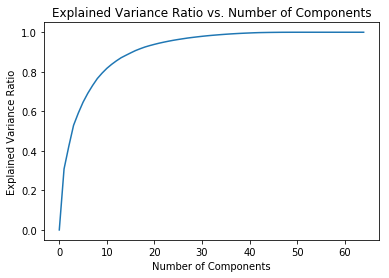

In [5]:
##########
# Part B #
##########

'''
(b) Perform PCA on the data. Create a plot showing the fraction of variance explained
as you incorporate from  1  to  N  components.
'''

# Load the libraries
from sklearn import decomposition

# List to hold the explained variance
PCA_Var = []

# Conducting PCA over 64 components as the images are 8 X 8
for i in range(0,65):
    pca = decomposition.PCA(i)                               # initiate the decompose
    pca.fit(onlyFives)                                       # call it on the 5 data
    PCA_Var.append(np.sum(pca.explained_variance_ratio_))    # add that variance to the list

print("\n\nPart B:\n")
    
# Plot the Variance against the number of components    
plt.title("Explained Variance Ratio vs. Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.plot(range(0,65), PCA_Var)
plt.show()



Part C:



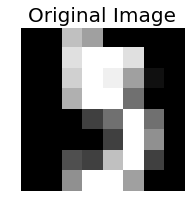

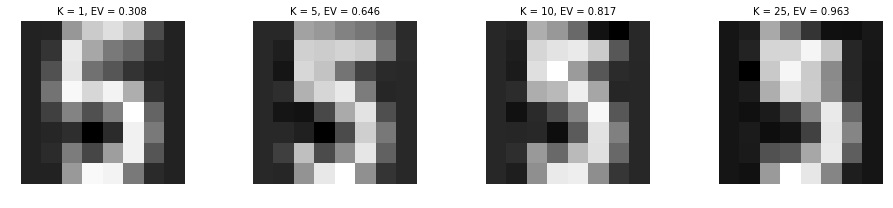

In [6]:
##########
# Part C #
##########

'''
(c) Select an image (from your dataset of 5's) that you will "compress" using PCA. 
Use the principal components extracted in (b) for data compression: 
choose the top  k  principal components and represent the data using a subset of the total principal components. 
Plot the original image, and compressed versions with different levels of compression 
(i.e. using different numbers of the top principal components): use  k=1,5,10,25 .
'''

# Select an image to compress
observation = onlyFives[0]
observation = np.array(observation)

print("\n\nPart C:\n")

# Plot the original image to be image
plt.figure(figsize = (3, 3))
plt.imshow(observation.reshape(8, 8), cmap = 'gray')
plt.title("Original Image", fontsize = 20)
plt.axis("off")
plt.show()

# Plot the images that are decompressed using PCA
plt.figure(figsize = (16, 3))

# Conduct PCA with the K values of 1, 5, 10, and 25
for i, k in enumerate([1, 5, 10, 25]):
    # Decompose the data with PCA
    pca = decomposition.PCA(k)                             # Initiate PCA with the number of dimensions listed
    pca.fit(onlyFives)                                     # Conduct PCA with the current K Value
    
    # store the explained variance ratio
    ev = pca.explained_variance_ratio_
    
    # Compress the data following the K values.
    transformed_data = pca.transform([observation])
    
    # Perform inverse transform to reconstruct image
    inv = pca.inverse_transform(transformed_data)
    
    # Plot the decomposed images
    plt.subplot(1,4,i+1)
    plt.axis("off")
    plt.title("K = {}, EV = {}".format(k,str(round(np.sum(ev),3))),fontsize=10)
    plt.imshow(inv.reshape(8,8), cmap = 'gray')
    
plt.show()

In [223]:
##########
# Part D #
##########

'''
(d) How many principal components are required to well-approximate the data in (c)? 
How much compression is achieved in each case 
(express compression as the ratio of  k  to the original dimension of the data  D , so it ranges from  0  to  1 ).
Comment on each case.
'''

print("\n\nPart D:\n")

print("Explained Variance ration increases as K increases. For ever 5 increases of K, there is an approximiatly 15% increase")
print("in EV. This slowes at K = 10 we can see that explained Variance passes 80%. Here EV increases much slower and needs")
print("nearly 10 additional values of K before reaching the same increase. If we expand the parameters beyond the give,")
print("at K = 18 is the last major jump in EV before it flattens to less than a % increase per K.")




Part D:

Explained Variance ration increases as K increases. For ever 5 increases of K, there is an approximiatly 15% increase
in EV. This slowes at K = 10 we can see that explained Variance passes 80%. Here EV increases much slower and needs
nearly 10 additional values of K before reaching the same increase. If we expand the parameters beyond the give,
at K = 18 is the last major jump in EV before it flattens to less than a % increase per K.


## 4

### [15 points] Build and test your own Neural Network for classification

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier.

**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.

**(b)** Create a training and test dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset. Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one, and the test data on the other. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve.

**(c)** Suggest at least two ways in which you neural network implementation could be improved.

**ANSWER**

In [345]:
##########
# Part A #
##########

'''
(a) Create a neural network class that follows the scikit-learn classifier convention by implementing fit, 
predict, and predict_proba methods. Your fit method should run backpropagation on your training data using stochastic 
gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, 
two hidden layers with five nodes each, and one output node.
'''

# import libraries
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import roc_curve, auc

# define our accuracy measure
def accuracy(l1, l2):
    assert(len(l1) == len(l2))
    ans = l1 - l2
    return 1 - np.count_nonzero(ans)/float(len(l1))


class NeuralNet(object):
    def __init__(self,layer_config):
        self.layers = layer_config
        self.num_layers= len(layer_config)
        self.weights = []
        self.biases = []
        
        # randomly initialize the layer
        for i in range(self.num_layers-1):
            self.weights.append(np.random.randn(self.layers[i], self.layers[i+1])+1)
            
        # Randomly initialize the bias
        for i in range(1,self.num_layers):
            self.biases.append(np.random.randn(self.layers[i], 1))
    
    # Sigmoid function
    def sigmoid(self, z):
        return 1.0/(1.0+np.exp(-z))
    
    # Derivative of Sigmoid Function
    def sigmoid_prime(self, z):
        return self.sigmoid(z)*(1-self.sigmoid(z))
    
    # Derivative of Cost
    def dC_daL(self, a, y):
        return (a-y)        
    
    
    def fit(self, train_data, train_labels, lr = .9, epochs = 100):
        
        # number of iterations
        for e in range(epochs):        
            
            # empty array to hold cost
            cost_arr = []
            train_data, train_labels
            
            self.propagate(train_data, train_labels, lr, cost_arr)
                        
    def propagate(self, train_data, train_labels, lr, cost_arr = []):
        # For each training sample
            for (x1, x2),y in zip(train_data, train_labels):
                
                # initial weights and bias for forward and backward propagate
                adj_w = [np.zeros(w.shape) for w in self.weights]
                adj_b = [np.zeros(b.shape) for b in self.biases]


                # Empty array to hold Z and activations as we forward propagate
                z = []
                activations = []

                activations.append(np.array([[x1], [x2]]))

                # Forward propagate the current event
                for i in range(self.num_layers-1):

                    # calculate z for that pass
                    z.append(np.dot(self.weights[i].transpose(), activations[-1]) + self.biases[i])

                    # calculate activations once we determine Z using the sigmoid
                    activations.append(self.sigmoid(z[-1]))

                # compute the cost of the activation
                cost = .5*(activations[-1] - y)**2
                # append cost to the array
                cost_arr.append(cost)
                

                # backwards propagate from the last layer defined
                delta = self.dC_daL(activations[-1], y) * self.sigmoid_prime(z[-1])

                # Record the weight and bias for the last layer
                adj_b[-1] += delta
                adj_w[-1] += np.dot(delta, activations[-2].transpose()).transpose()

                # backwards propagate through the remaining layers
                for l in range(2, self.num_layers):
                    # using the last z value
                    z = z[-l]
                    
                    daL_dzL = self.sigmoid_prime(z)
                    
                    # calculate delta given the last weight and derivative
                    delta = np.dot(self.weights[-l+1], delta) * daL_dzL
                    adj_b[-l] += delta
                    adj_w[-l] += np.dot(delta, activations[-l-1].transpose()).transpose()

                # update the weights to reduce bias
                for i in range(len(self.biases)):
                    for j in range(len(self.biases[i])):
                        self.biases[i][j] = self.biases[i][j] - lr*adj_b[i][j]       
                for i in range(len(self.weights)):
                    for j in range(len(self.weights[i])):
                        self.weights[i][j] = self.weights[i][j] - lr*adj_w[i][j]
 
    def predict(self, test_data): 
        predictions = []
        for x1,x2 in test_data:
            z = []
            activations = []
            activations.append(np.array([[x1],[x2]]))
            # Run the forward propagation through the layers
            for i in range(self.num_layers-1):
                # Compute w^Tx + b for this layer and call it z
                z.append(np.dot(self.weights[i].transpose(),activations[-1]) + self.biases[i])
                # Compute the activations from z
                activations.append(self.sigmoid(z[-1]))
            # Check if you were right or wrong
            guess = activations[-1]
            if guess > .5:
                predictions.append(1)
            else:
                predictions.append(0)         
        return predictions
    
    def predict_proba(self, test_data):
        probs = []
        for x1,x2 in test_data:
            z = []
            activations = []
            activations.append(np.array([[x1],[x2]]))
            # run the forward propagation through the layers
            for i in range(self.num_layers-1):
                # Calculate Z
                z.append(np.dot(self.weights[i].transpose(),activations[-1]) + self.biases[i])
                # Calulate the activations from z
                activations.append(self.sigmoid(z[-1]))      
            guess = activations[-1]
            probs.append(guess)      
        return probs
    

Classifier Model Accuracy: 0.9


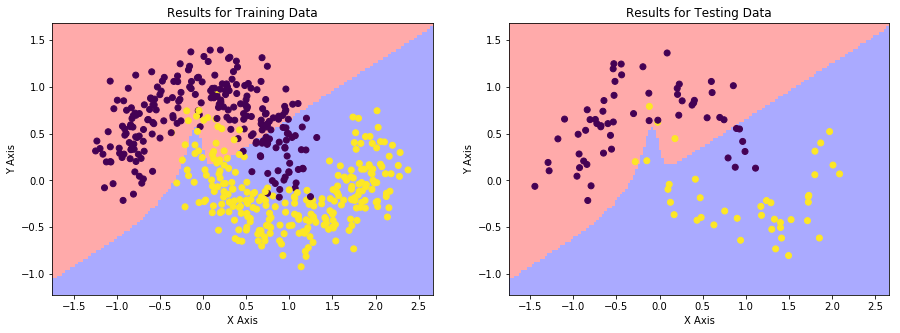

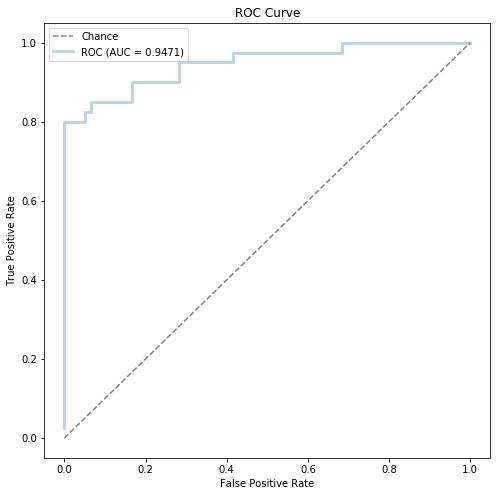

In [353]:
##########
# Part B #
##########

'''
(b) Create a training and test dataset using sklearn.datasets.make_moons(N, noise=0.20), 
where  Ntrain=500  and  Ntest=100 . Train and test your model on this dataset. 
Adjust the learning rate and number of training epochs for your model to improve performance as needed. 
In two subplots, plot the training data on one, and the test data on the other. On each plot, 
also plot the decision boundary from your neural network trained on the training data. 
Report your performance on the test data with an ROC curve.
'''

#### Generate Train and Test Data
X, y = make_moons(600, noise = 0.20)
X_train = X[:N_train]
y_train = y[:N_train]
X_test = X[N_train:]
y_test = y[N_train:]

# Create the net with the desired structure
clf = NeuralNet([2, 5, 5, 1])

# Train the model with the training data
clf.fit(X_train, y_train, lr = .3, epochs = 500)

# Test the model on the test data
preds = clf.predict(X_test)
preds_prob = clf.predict_proba(X_test)
print("Classifier Model Accuracy: {}".format(accuracy(y_test, preds)))

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, np.squeeze(np.array(preds_prob)))
roc_auc = auc(fpr, tpr)

# Plot the findings with the decision boundry
plt.figure(figsize = (15, 5))

# Compute the decision boundary using a mesh grid
x1_vals = [x[0] for x in X]
x2_vals = [x[1] for x in X]

x_min = np.array(x1_vals).min() - .3
x_max = np.array(x1_vals).max() + .3
y_min = np.array(x2_vals).min() - .3
y_max = np.array(x2_vals).max() + .3

h = .03 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
mesh_preds = np.array(net.predict(np.c_[xx.ravel(), yy.ravel()]))
mesh_preds = mesh_preds.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])

# Plot the subplot for the training data
plt.subplot(1,2,1)
plt.title("Results for Training Data")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.pcolormesh(xx, yy, mesh_preds,cmap = cmap_light)
plt.scatter([x[0] for x in X_train], [x[1] for x in X_train], c = y_train)

# Plot the subplot for the testing data
plt.subplot(1,2,2)
plt.title("Results for Testing Data")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.pcolormesh(xx, yy, mesh_preds,cmap = cmap_light)
plt.scatter([x[0] for x in X_test], [x[1] for x in X_test],c = y_test)
plt.show()

# plot the ROC Curve
plt.figure(figsize = (8, 8))
plt.title("ROC Curve")
plt.plot([0,1],[0,1],'--', color = 'gray', label = 'Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc = 'lower right')
plt.plot(fpr, tpr, lw = 3, alpha = 0.3, label = 'ROC (AUC = %0.4f)' % (roc_auc))
plt.legend()

plt.show()

In [348]:
##########
# Part C #
##########

'''
(c) Suggest at least two ways in which you neural network implementation could be improved.
'''
print("\n\nPart C:\n")

print('Beyond what is given in the question for changing both the learning rate and number of epochs or iterations that the')
print('model undergoes for learning, there are numerous other ways to improve the output.')
print('')
print('First we could increase the number of nodes or neurons within a hidden layer, this would allow more ativations to occur within')
print('layer to potentially find more patterns to evaluate from,')
print('')
print('Next, we could add attional hidden layers to not only increase the number of nodes or nuerons, but also the interactions')
print('between these layers.')
print('')
print('Additionally, we could change the type of activation function from sigmoid to something like a Rectified Linear Unit (ReLU)')
print('This would allow us to ensure greater sparsity and the likelihood to reduce a vanishing gradient.')




Part C:

Beyond what is given in the question for changing both the learning rate and number of epochs or iterations that the
model undergoes for learning, there are numerous other ways to improve the output.

First we could increase the number of nodes or neurons within a hidden layer, this would allow more ativations to occur within
layer to potentially find more patterns to evaluate from,

Next, we could add attional hidden layers to not only increase the number of nodes or nuerons, but also the interactions
between these layers.

Additionally, we could change the type of activation function from sigmoid to something like a Rectified Linear Unit (ReLU)
This would allow us to ensure greater sparsity and the likelihood to reduce a vanishing gradient.
